In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [39]:
df = pd.read_csv('/workspaces/spotify-churn-analysis/data/spotify_churn_dataset.csv')
df.head()

,user_id,gender,age,country,subscription_type,listening_time,songs_played_per_day,skip_rate,device_type,ads_listened_per_week,offline_listening,is_churned
0,1,Female,54,CA,Free,26,23,0.20,Desktop,31,0,1
1,2,Other,33,DE,Family,141,62,0.34,Web,0,1,0
2,3,Male,38,AU,Premium,199,38,0.04,Mobile,0,1,1
3,4,Female,22,CA,Student,36,2,0.31,Mobile,0,1,0
4,5,Other,29,US,Family,250,57,0.36,Mobile,0,1,1


Encoding

In [40]:
le_gender = LabelEncoder()
le_subscription = LabelEncoder()

df['gender'] = le_gender.fit_transform(df['gender'])
df['subscription_type'] = le_subscription.fit_transform(df['subscription_type'])

df = pd.get_dummies(df, columns=['country', 'device_type'], drop_first=True)

In [41]:
df.head()

,user_id,gender,age,subscription_type,listening_time,songs_played_per_day,skip_rate,ads_listened_per_week,offline_listening,is_churned,country_CA,country_DE,country_FR,country_IN,country_PK,country_UK,country_US,device_type_Mobile,device_type_Web
0,1,0,54,1,26,23,0.20,31,0,1,True,False,False,False,False,False,False,False,False
1,2,2,33,0,141,62,0.34,0,1,0,False,True,False,False,False,False,False,False,True
2,3,1,38,2,199,38,0.04,0,1,1,False,False,False,False,False,False,False,True,False
3,4,0,22,3,36,2,0.31,0,1,0,True,False,False,False,False,False,False,True,False
4,5,2,29,0,250,57,0.36,0,1,1,False,False,False,False,False,False,True,True,False


In [42]:
df.columns

Index(['user_id', 'gender', 'age', 'subscription_type', 'listening_time',
       'songs_played_per_day', 'skip_rate', 'ads_listened_per_week',
       'offline_listening', 'is_churned', 'country_CA', 'country_DE',
       'country_FR', 'country_IN', 'country_PK', 'country_UK', 'country_US',
       'device_type_Mobile', 'device_type_Web'],
      dtype='object')

In [43]:
features = ['gender', 'age', 'subscription_type', 'listening_time',
       'songs_played_per_day', 'skip_rate', 'ads_listened_per_week',
       'offline_listening', 'country_CA', 'country_DE',
       'country_FR', 'country_IN', 'country_PK', 'country_UK', 'country_US',
       'device_type_Mobile', 'device_type_Web']

X = df[features]
y = df['is_churned']

Spliting data

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)       

Standarization of the features

In [45]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [46]:
X_train[:15], X_test[:15]

(array([[ 1.23089087, -0.05515228, -1.38188294, -0.2197806 , -0.1077059 ,
          0.68391782, -0.5075827 ,  0.57710971, -0.37281725, -0.37985195,
         -0.37036642, -0.38200339, -0.38361307, -0.37091177,  2.64386317,
          1.44115338, -0.70801848],
        [-1.21940511,  0.65111075,  1.34411648,  0.93608727,  0.17386378,
         -1.67237581, -0.5075827 ,  0.57710971, -0.37281725, -0.37985195,
         -0.37036642, -0.38200339, -0.38361307, -0.37091177, -0.3782344 ,
         -0.69388867,  1.41239251],
        [ 0.00574288, -1.15378366, -1.38188294, -1.64972024, -0.24849074,
         -0.2356114 , -0.5075827 ,  0.57710971, -0.37281725,  2.63260464,
         -0.37036642, -0.38200339, -0.38361307, -0.37091177, -0.3782344 ,
         -0.69388867, -0.70801848],
        [ 0.00574288, -0.13362595, -0.47321646,  0.61435085, -0.60045284,
         -0.29308198,  2.88552237, -1.7327728 , -0.37281725, -0.37985195,
          2.70002879, -0.38200339, -0.38361307, -0.37091177, -0.3782344 ,
    

In [47]:
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    precision_recall_curve,
    auc
)
def evaluate_model(name, model, X_test, y_test):
    print(f"  Scores: {name}")
    print("------------------------------")

    probs = model.predict_proba(X_test)[:, 1]
    preds = model.predict(X_test)

    roc = roc_auc_score(y_test, probs)
    p, r, _ = precision_recall_curve(y_test, probs)
    pr_auc = auc(r, p)

    cm = confusion_matrix(y_test, preds)
    report = classification_report(y_test, preds)

    print(f"ROC AUC: {round(roc,4)}")
    print(f"PR AUC:  {round(pr_auc,4)}")
    print("\nConfusion Matrix:")
    print(cm)
    print("\nClassification Report:")
    print(report)

    return {
        "ROC_AUC": roc,
        "PR_AUC": pr_auc,
        "CM": cm,
        "Report": report
    }


In [48]:
results = {}

Logistic Regression

In [49]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=2000)
log_reg.fit(X_train, y_train)
results["Logistic Regression"] = evaluate_model("Logistic Regression", log_reg, X_test, y_test)

  Scores: Logistic Regression
------------------------------
ROC AUC: 0.521
PR AUC:  0.2611

Confusion Matrix:
[[1200    0]
 [ 400    0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.75      1.00      0.86      1200
           1       0.00      0.00      0.00       400

    accuracy                           0.75      1600
   macro avg       0.38      0.50      0.43      1600
weighted avg       0.56      0.75      0.64      1600



/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


Random forest

In [50]:
rf = RandomForestClassifier(n_estimators=200, class_weight="balanced", random_state=42)
rf.fit(X_train, y_train)
results["Random Forest"] = evaluate_model("Random Forest", rf, X_test, y_test)

  Scores: Random Forest
------------------------------
ROC AUC: 0.5359
PR AUC:  0.2781

Confusion Matrix:
[[1195    5]
 [ 397    3]]

Classification Report:
              precision    recall  f1-score   support

           0       0.75      1.00      0.86      1200
           1       0.38      0.01      0.01       400

    accuracy                           0.75      1600
   macro avg       0.56      0.50      0.44      1600
weighted avg       0.66      0.75      0.65      1600



GRADIENT BOOSTING

In [51]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=200, learning_rate=0.05, random_state=42)
gb.fit(X_train, y_train)
results["Gradient Boosting"] = evaluate_model("Gradient Boosting", gb, X_test, y_test)

  Scores: Gradient Boosting
------------------------------
ROC AUC: 0.5155
PR AUC:  0.2499

Confusion Matrix:
[[1194    6]
 [ 399    1]]

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.99      0.85      1200
           1       0.14      0.00      0.00       400

    accuracy                           0.75      1600
   macro avg       0.45      0.50      0.43      1600
weighted avg       0.60      0.75      0.64      1600



 XGBOOST

In [52]:
from xgboost import XGBClassifier
xgb = XGBClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=(y_train==0).sum() / (y_train==1).sum(),
    eval_metric="logloss",
    random_state=42
)
xgb.fit(X_train, y_train)
results["XGBoost"] = evaluate_model("XGBoost", xgb, X_test, y_test)

  Scores: XGBoost
------------------------------
ROC AUC: 0.5249
PR AUC:  0.2682

Confusion Matrix:
[[783 417]
 [241 159]]

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.65      0.70      1200
           1       0.28      0.40      0.33       400

    accuracy                           0.59      1600
   macro avg       0.52      0.53      0.51      1600
weighted avg       0.64      0.59      0.61      1600



In [53]:
print("\nSummary of Model Performance:")    
for name, res in results.items():
    print(f"{name}: ROC={round(res['ROC_AUC'],4)},  PR AUC={round(res['PR_AUC'],4)}")


Summary of Model Performance:
Logistic Regression: ROC=0.521,  PR AUC=0.2611
Random Forest: ROC=0.5359,  PR AUC=0.2781
Gradient Boosting: ROC=0.5155,  PR AUC=0.2499
XGBoost: ROC=0.5249,  PR AUC=0.2682


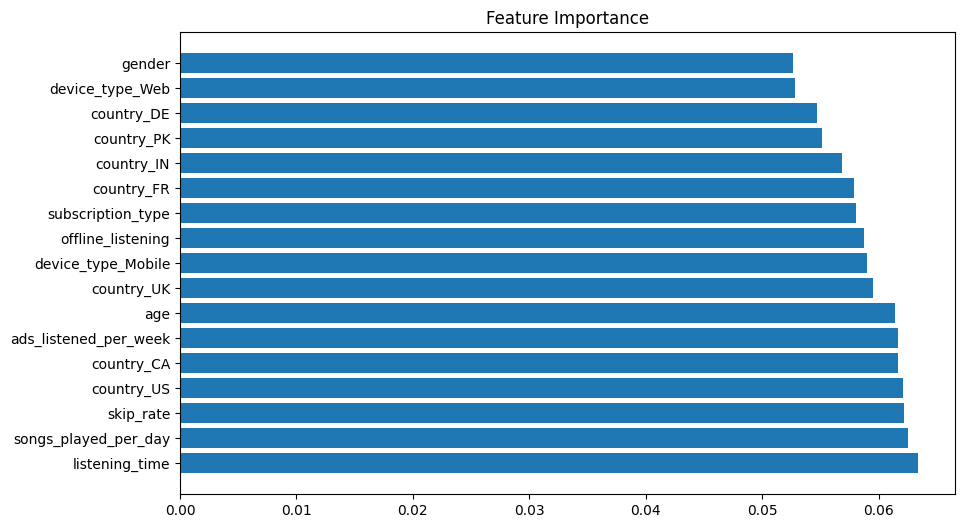

In [54]:
importances = xgb.feature_importances_
indices = np.argsort(importances)[::-1] 
names = [features[i] for i in indices]

plt.figure(figsize=(10, 6))
plt.title('Feature Importance')
plt.barh(range(X.shape[1]), importances[indices])
plt.yticks(range(X.shape[1]), names)
plt.show()

In [55]:
y_train.value_counts()

is_churned
0    4729
1    1671
Name: count, dtype: int64

In [56]:
df = pd.read_csv('/workspaces/spotify-churn-analysis/data/spotify_churn_dataset.csv')

df['gender'] = le_gender.fit_transform(df['gender'])
df['subscription_type'] = le_subscription.fit_transform(df['subscription_type'])

df = pd.get_dummies(df, columns=['country', 'device_type'], drop_first=True)

In [57]:
# Pokazuje mapping kategorii → liczba
dict(zip(le_subscription.classes_, range(len(le_subscription.classes_))))


{'Family': 0, 'Free': 1, 'Premium': 2, 'Student': 3}

In [58]:
df.head()

,user_id,gender,age,subscription_type,listening_time,songs_played_per_day,skip_rate,ads_listened_per_week,offline_listening,is_churned,country_CA,country_DE,country_FR,country_IN,country_PK,country_UK,country_US,device_type_Mobile,device_type_Web
0,1,0,54,1,26,23,0.20,31,0,1,True,False,False,False,False,False,False,False,False
1,2,2,33,0,141,62,0.34,0,1,0,False,True,False,False,False,False,False,False,True
2,3,1,38,2,199,38,0.04,0,1,1,False,False,False,False,False,False,False,True,False
3,4,0,22,3,36,2,0.31,0,1,0,True,False,False,False,False,False,False,True,False
4,5,2,29,0,250,57,0.36,0,1,1,False,False,False,False,False,False,True,True,False


In [59]:
df['listening_per_song'] = df['listening_time'] / (df['songs_played_per_day'] + 1e-5)
df['ads_per_minute'] = df['ads_listened_per_week'] / (df['listening_time'] + 1e-5)
df['premium_mobile'] = ((df['subscription_type'] == 2) & (df['device_type_Mobile'] == True)).astype(int)

df[['listening_per_song', 'ads_per_minute', 'premium_mobile']].head()

,listening_per_song,ads_per_minute,premium_mobile
0,1.130434,1.192307,0
1,2.274193,0.000000,0
2,5.236841,0.000000,1
3,17.999910,0.000000,0
4,4.385964,0.000000,0


In [60]:
df.columns

Index(['user_id', 'gender', 'age', 'subscription_type', 'listening_time',
       'songs_played_per_day', 'skip_rate', 'ads_listened_per_week',
       'offline_listening', 'is_churned', 'country_CA', 'country_DE',
       'country_FR', 'country_IN', 'country_PK', 'country_UK', 'country_US',
       'device_type_Mobile', 'device_type_Web', 'listening_per_song',
       'ads_per_minute', 'premium_mobile'],
      dtype='object')

In [61]:
features = [
    'gender', 'age', 'subscription_type', 'listening_time',
       'songs_played_per_day', 'skip_rate', 'ads_listened_per_week',
       'offline_listening', 'country_CA', 'country_DE',
       'country_FR', 'country_IN', 'country_PK', 'country_UK', 'country_US',
       'device_type_Mobile', 'device_type_Web', 'listening_per_song',
       'ads_per_minute', 'premium_mobile'
] + [col for col in df.columns if col.startswith('subscription_type_') or col.startswith('device_type_') or col.startswith('country_')]


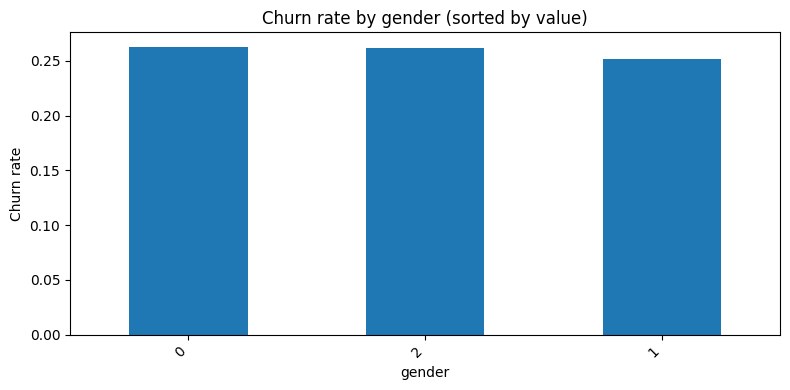

/tmp/ipykernel_7250/1256394447.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate = df.groupby(bins)['is_churned'].mean().sort_values(ascending=False)


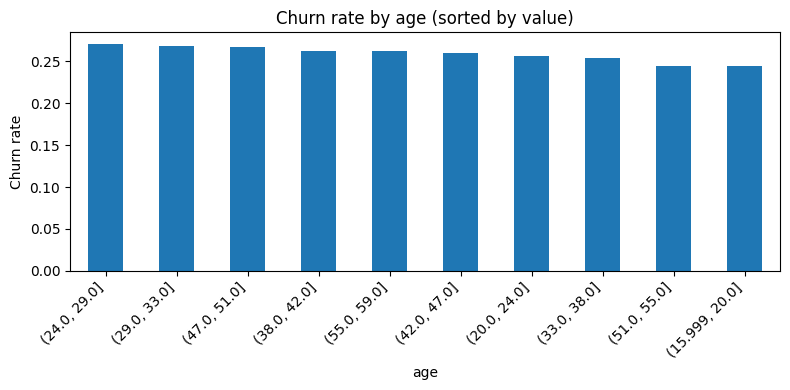

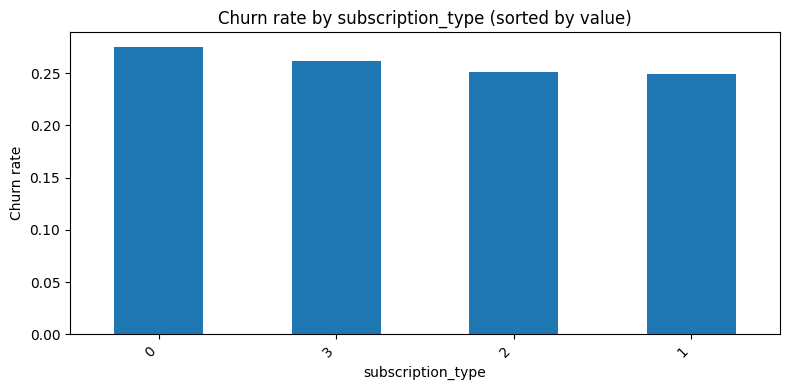

/tmp/ipykernel_7250/1256394447.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate = df.groupby(bins)['is_churned'].mean().sort_values(ascending=False)


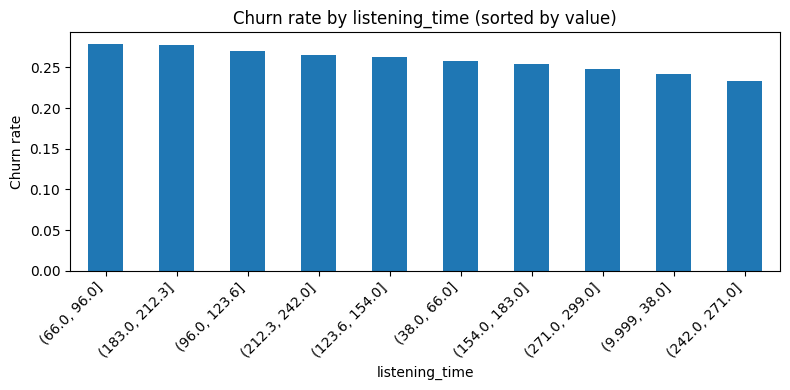

/tmp/ipykernel_7250/1256394447.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate = df.groupby(bins)['is_churned'].mean().sort_values(ascending=False)


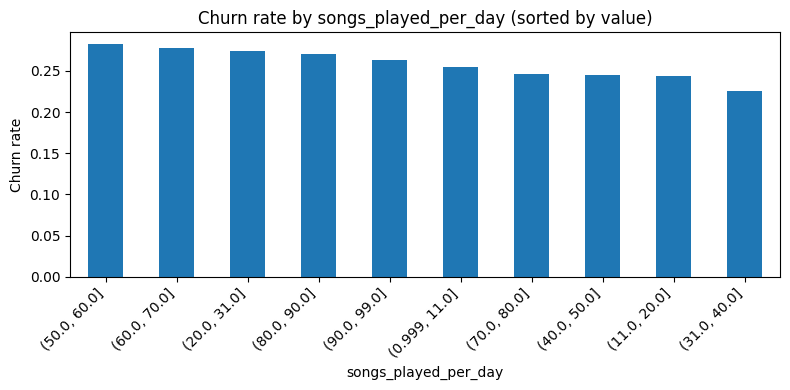

/tmp/ipykernel_7250/1256394447.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate = df.groupby(bins)['is_churned'].mean().sort_values(ascending=False)


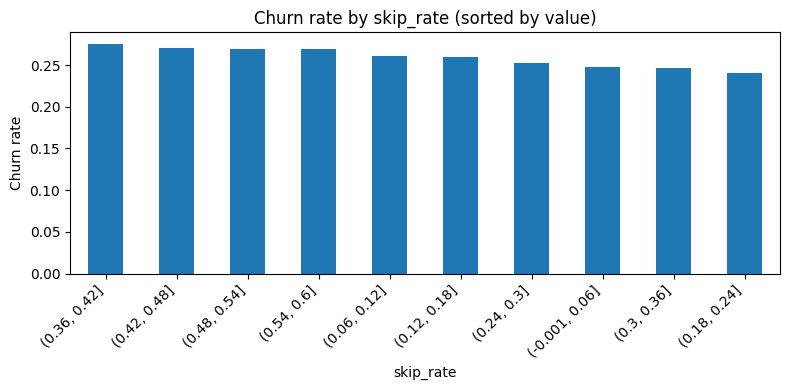

/tmp/ipykernel_7250/1256394447.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate = df.groupby(bins)['is_churned'].mean().sort_values(ascending=False)


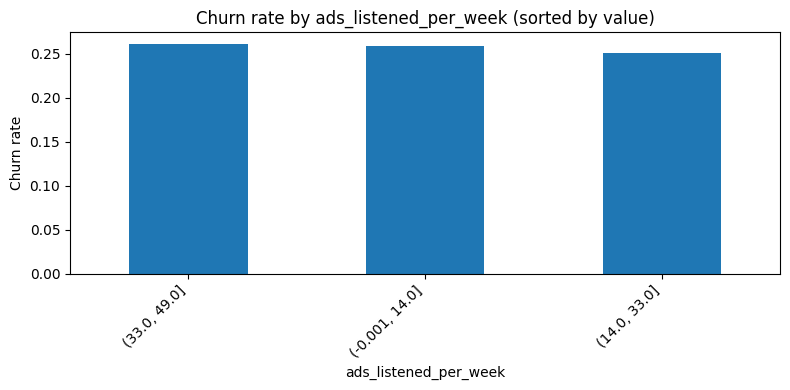

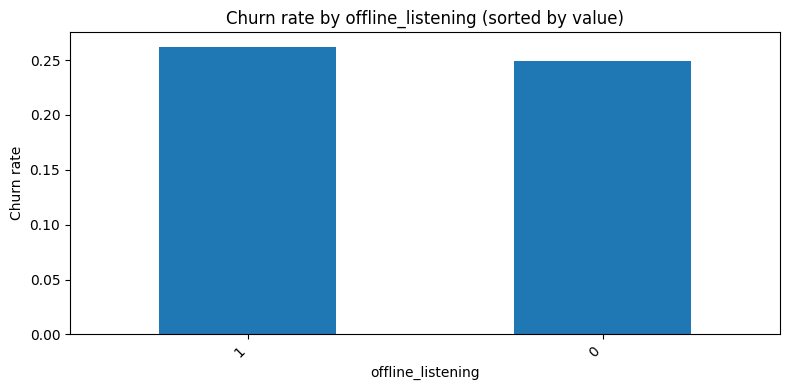

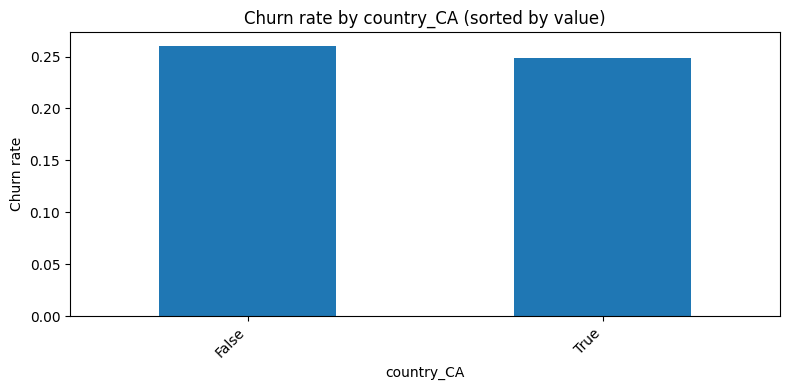

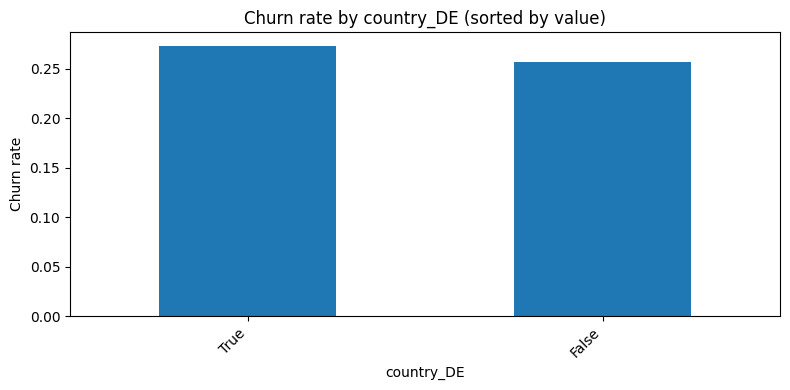

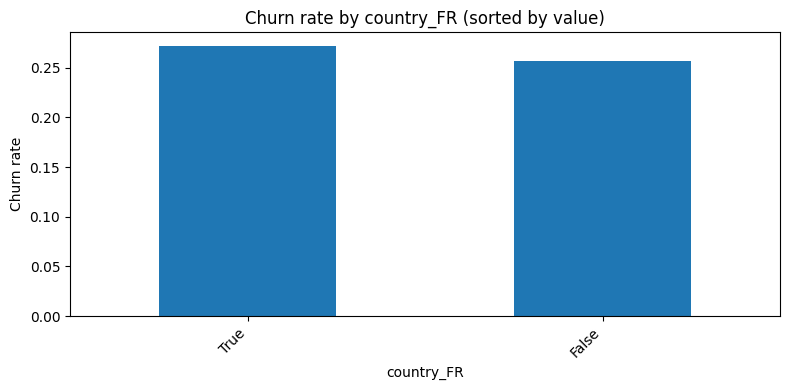

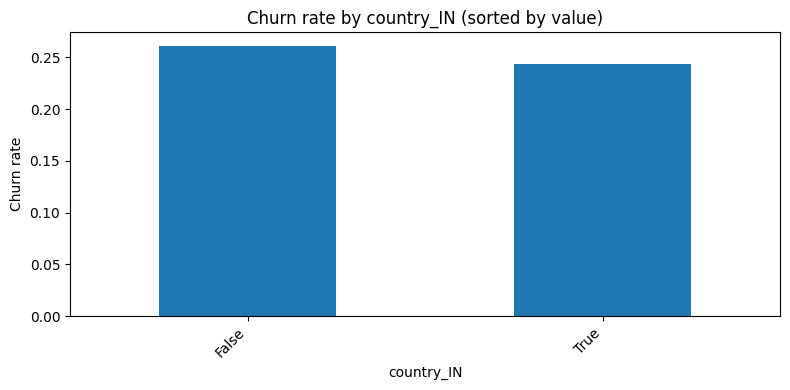

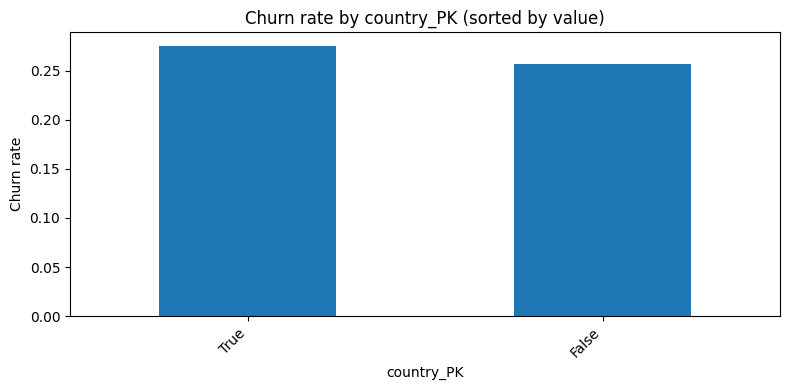

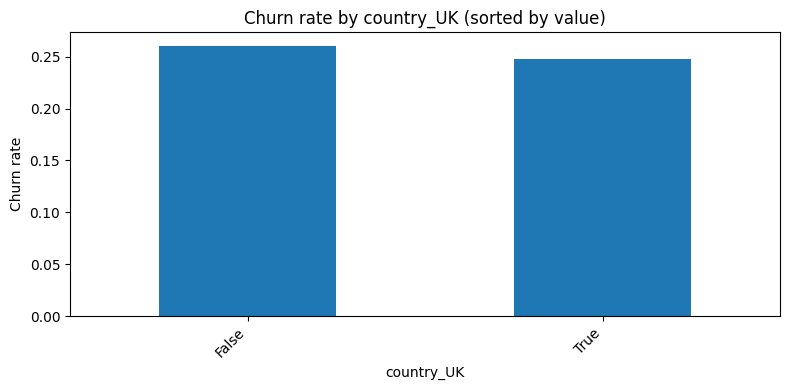

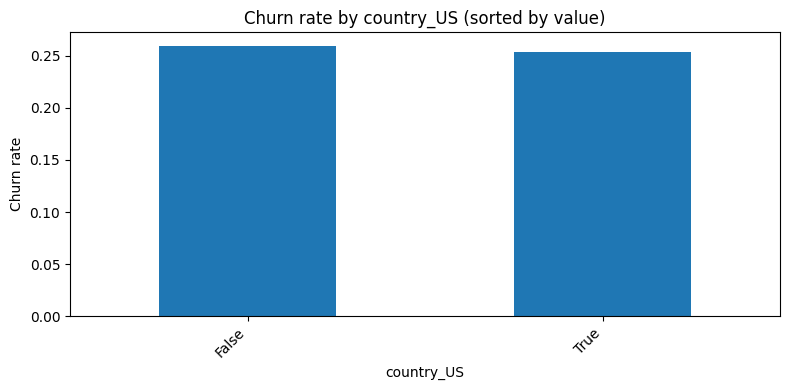

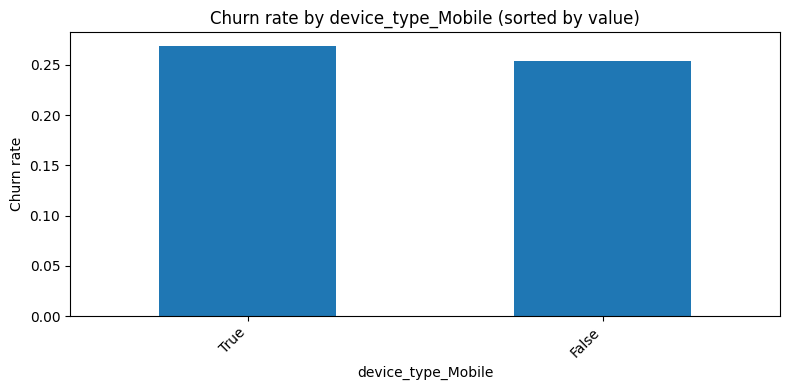

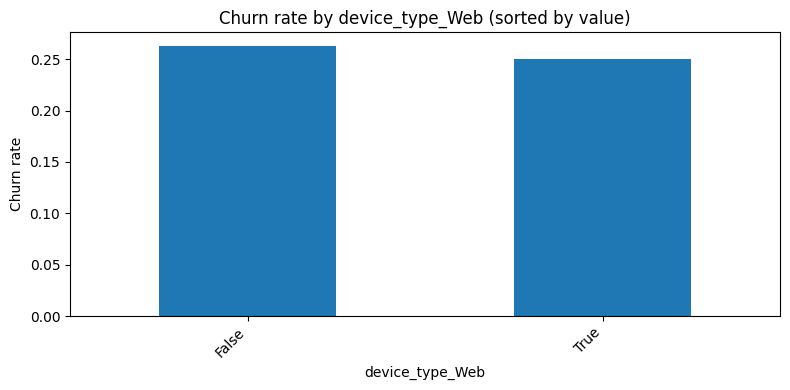

/tmp/ipykernel_7250/1256394447.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate = df.groupby(bins)['is_churned'].mean().sort_values(ascending=False)


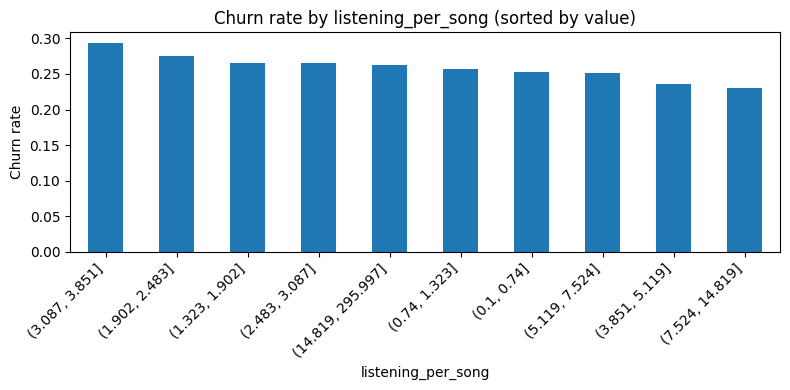

/tmp/ipykernel_7250/1256394447.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate = df.groupby(bins)['is_churned'].mean().sort_values(ascending=False)


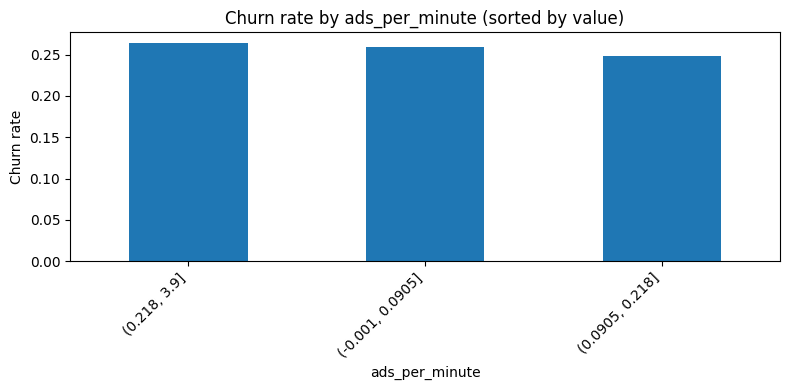

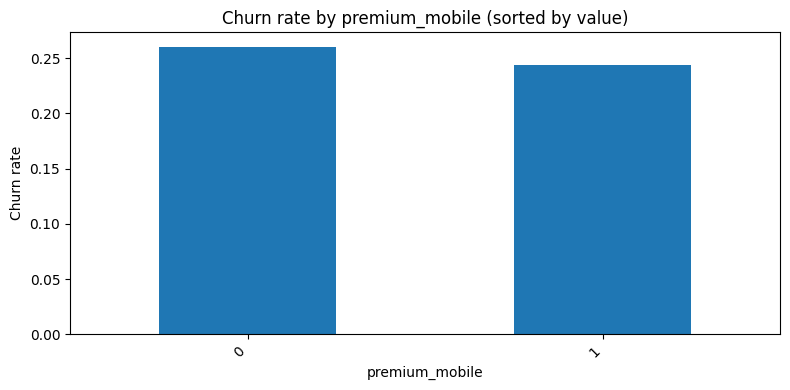

In [62]:
# influence of features on churn rate
# influence of features on churn rate (sorted by churn rate)
unique_features = list(dict.fromkeys(features))  # remove duplicates while preserving order

for col in unique_features:
    plt.figure(figsize=(8,4))
    ser = df[col]
    
    # For numeric columns with many unique values, bin into quantiles
    if pd.api.types.is_numeric_dtype(ser) and ser.nunique() > 10:
        bins = pd.qcut(ser, q=10, duplicates='drop')
        churn_rate = df.groupby(bins)['is_churned'].mean().sort_values(ascending=False)
        x_labels = [str(x) for x in churn_rate.index]
        churn_rate.index = x_labels
    else:
        churn_rate = df.groupby(col)['is_churned'].mean().sort_values(ascending=False)
    
    churn_rate.plot(kind='bar')
    plt.title(f"Churn rate by {col} (sorted by value)")
    plt.ylabel("Churn rate")
    plt.xlabel(col)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


In [63]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, precision_recall_curve, auc

In [64]:
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "SVM": SVC(kernel='linear', probability=True, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

In [65]:
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1] if hasattr(model, "predict_proba") else model.decision_function(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_proba)
    precision, recall, _ = precision_recall_curve(y_test, y_proba)
    pr_auc = auc(recall, precision)
    
    results.append({
        "Model": name,
        "Accuracy": round(acc, 4),
        "ROC_AUC": round(roc, 4),
        "PR_AUC": round(pr_auc, 4)
    })

results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by="PR_AUC", ascending=False)
results_df.reset_index(drop=True, inplace=True)
results_df

/usr/local/python/3.12.1/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [20:17:11] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,Model,Accuracy,ROC_AUC,PR_AUC
0,KNN,0.7075,0.5521,0.2894
1,Random Forest,0.7431,0.5471,0.2818
2,XGBoost,0.7113,0.5356,0.2779
3,SVM,0.7500,0.5168,0.2673
4,Logistic Regression,0.7500,0.5210,0.2611
5,Gradient Boosting,0.7462,0.5103,0.2480


In [ ]:
import shap
import pandas as pd

model_name = "Random Forest"  # "Gradient Boosting", "XGBoost"
model = models[model_name]

In [69]:
idx = np.random.choice(X_test.shape[0], size=500, replace=False)
X_sample = X_test[idx, :]

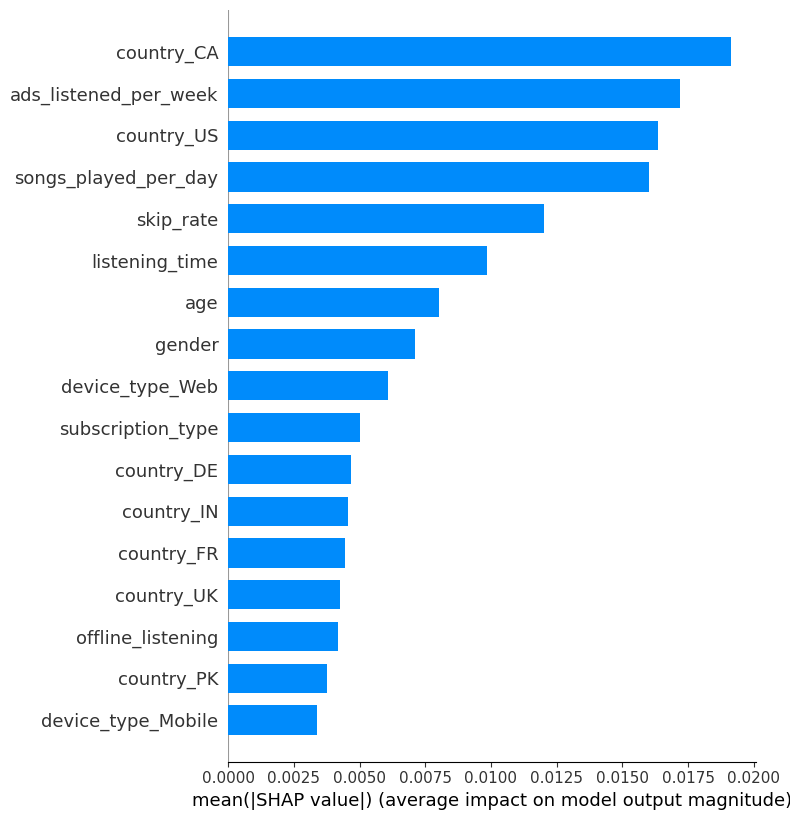

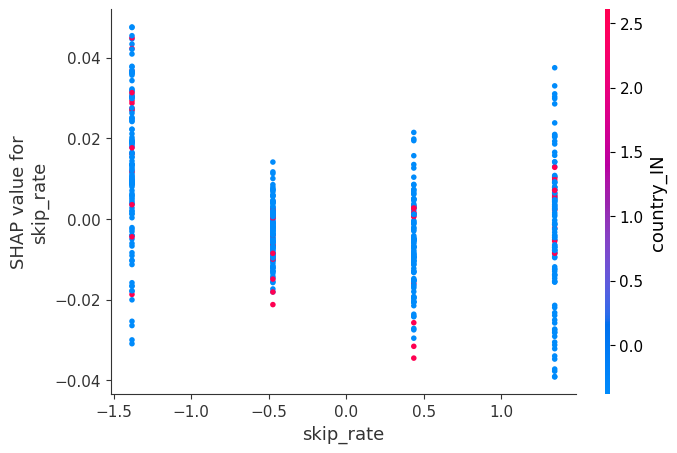

In [71]:
# convert the numpy array X_sample to a DataFrame with the correct feature names
X_sample_df = pd.DataFrame(X_sample, columns=names)

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_sample_df)

# shap can return a list (one array per class) or a 3D array (n_samples, n_features, n_classes)
# normalize to a 2D array for the positive class
if isinstance(shap_values, list):
	sv = shap_values[1]
elif getattr(shap_values, "ndim", 0) == 3 and shap_values.shape[2] == 2:
	sv = shap_values[:, :, 1]
else:
	sv = shap_values

# produce summary and dependence plots using the DataFrame (so columns are available)
shap.summary_plot(sv, X_sample_df, feature_names=X_sample_df.columns, plot_type="bar")
shap.dependence_plot("skip_rate", sv, X_sample_df, feature_names=X_sample_df.columns)